이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_cd = train_images

In [1]:
import numpy as np

In [14]:
## dimension extension

a  = np.array([[1,2],[3,4],[5,6]])

print(a.shape)

b = a.reshape((1,*a.shape))

print(b.shape)

c = np.reshape(a,(1,3,2))

print(c.shape)

d = np.expand_dims(a,axis=0)

print(d.shape)

e = np.expand_dims(a,axis=-1)

print(e.shape)

f = a.reshape((*a.shape,1))

print(f.shape)

print(f)

(3, 2)
(1, 3, 2)
(1, 3, 2)
(1, 3, 2)
(3, 2, 1)
(3, 2, 1)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


In [ ]:
a = np.array([[1],[2],[3],[4]])
b = np.array([[1,2,3,4],[1,2,3,4]])
b.shape


(2, 4)

In [ ]:
a = np.eye(2)
print(a)
a.ndim

[[1. 0.]
 [0. 1.]]


2

In [ ]:
c = np.array(range(1,13))

c.shape

c.ndim

1

In [ ]:
a =np.reshape(np.array(range(1,13)),(-1,4))
print(a)
a




[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
y = a.T  
y




array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [ ]:

b= y[:,0:1]
F= y[:,0]
print(b)
print(F)
print(b.ndim)
print(F.shape)

[[1]
 [2]
 [3]
 [4]]
[1 2 3 4]
2
(4,)


In [ ]:
b = a[1,1:3]
print(b)
b.ndim

# print(len(b))
# print(b)

[6 7]


1

In [ ]:
c = np.array([[[1,2,3]]])
c.ndim
c
print(c)
c.ndim


[[[1 2 3]]]


3

In [ ]:
xx = np.array([[[1,2,3],[4,5,6]]])
xx.shape  # 행 , 열 순  -> ndim : 3 이다.

(1, 2, 3)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers   # from tensorflow.keras.layers import Dense  , Dense(10,  ) 이런식 가능
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #512개의 뉴런 , ouput:  512개  , keras.layers.Dense라고 해도된다.
    layers.Dense(10, activation="softmax") # 마지막꺼는 10개의 뉴런, 분류해야되는 갯수:10개이다.(0-9)
])

**컴파일 단계**

In [ ]:
model.compile(optimizer="rmsprop",                     #optimizer:최적화 ,weight를 고쳐주는 알고리즘(ex.rmsprop)
              loss="sparse_categorical_crossentropy",  #softmax가 확률이기 때문에 이것을 쓴다.
              metrics=["accuracy"])

**이미지 데이터 준비하기**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) # ((-1,28*28)),((60000,-1)) 이렇게 해도가능
train_images = train_images.astype("float32") / 255 # 입력값을 255안에서 제한하려고
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
train_cd1 = train_cd.reshape(60000,28*28)
train_cd2 = train_cd.reshape(60000,-1)
train_cd2.shape

(60000, 784)

**모델 훈련**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) # 60000개중 128개씩 한 것이다.

Epoch 1/5
469/469 [==============================] - 10s 3ms/step - loss: 0.2613 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9886


**모델을 사용해 예측 만들기**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 63ms/step


array([6.4227947e-08, 2.1839377e-08, 1.7873746e-05, 8.4122829e-04,
       5.0893959e-11, 1.8827303e-07, 3.7252128e-12, 9.9913245e-01,
       5.8173032e-07, 7.4604704e-06], dtype=float32)

In [ ]:
predictions[0].argmax() # test - > argmax 알기

7

In [ ]:
predictions[0][7]

0.99913245

In [ ]:
test_labels[0]

7

**새로운 데이터에서 모델 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9788
테스트 정확도: 0.9787999987602234


## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### 벡터 (랭크-1 텐서)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [ ]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.shape

(3, 5)

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x4= np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x4.ndim
# x4.ndim

3

### 핵심 속성

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**다섯 번째 이미지 출력하기**

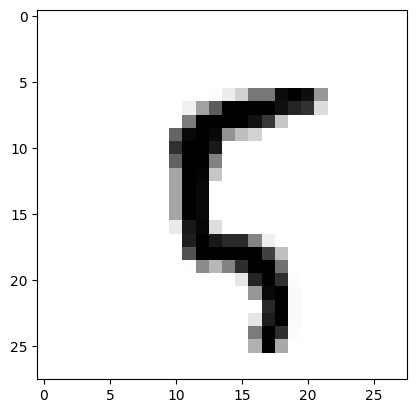

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[100]  
plt.imshow(digit, cmap=plt.cm.binary)  # imshow 함수: 이미지나 배열을 그릴때 사용된다. -> 시각화 , cmap=plt.cm.binary 매개변수를 전달하면 주어진 배열이 흑백으로 표현
plt.show()

In [ ]:
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :] #나머지 두축 : : 은  28 , 28 이다.
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]


In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

In [ ]:
my_slice3= train_images[:, 14:, 14:]
my_slice3

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

### 배치 데이터

In [ ]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]   # rain_images 배열에서 128 * n번째부터 128 * (n + 1)번째까지의 이미지를 선택하여 batch 배열에 할당하는 코드

### 텐서의 실제 사례

### 벡터 데이터

### 시계열 데이터 또는 시퀀스 데이터

### 이미지 데이터

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 3.27 s


### 브로드캐스팅

In [ ]:
import numpy as np
X = np.random.random((32, 10))  # 2차원 배열  , # np.random.random 은 0과1사이의 균일 분포에서 랜덤한 값을 추출하여 배열에 할당
y = np.random.random((10,))     # 1차원 배열

In [ ]:
y = np.expand_dims(y, axis=0)  

In [ ]:
Y = np.concatenate([y] * 32, axis=0)  #위 코드는 y 배열을 32번 반복하여 새로운 배열 Y를 생성하는 코드 , #Y 배열은 y 배열을 32번 반복한 (32, 10) 크기의 2차원 배열이 됩니다.

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))  #어디가 브로드 캐스팅 부분일까 . y가 x처럼 된다는데
y = np.random.random((32, 10))
z = np.maximum(x, y)

### 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법

### 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x1 = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x1

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.zeros((2, 2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])    #뒤에 값이 미분하는 대상이므로 , variable을 해줘야된다. 

## 첫 번째 예제 다시 살펴보기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2673 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9883


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):   #__call__기능  , 
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property #closedecorator 개념이다. -> weight()이렇게 안하고 .weight하면 작동한다. :java의 getter기능 ,self.weight이런게 없다.
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([ #naviesequential의 init이 불린다.
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu), #naivedense의 init이 불린다. 
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4 #property와 연관

#### 배치 제너레이터

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)   # 이떄 _call_이 불린다.
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 5.83
100번째 배치 손실: 2.22
200번째 배치 손실: 2.17
300번째 배치 손실: 2.08
400번째 배치 손실: 2.23
에포크 1
0번째 배치 손실: 1.88
100번째 배치 손실: 1.87
200번째 배치 손실: 1.80
300번째 배치 손실: 1.72
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.56
100번째 배치 손실: 1.58
200번째 배치 손실: 1.49
300번째 배치 손실: 1.42
400번째 배치 손실: 1.54
에포크 3
0번째 배치 손실: 1.30
100번째 배치 손실: 1.34
200번째 배치 손실: 1.23
300번째 배치 손실: 1.21
400번째 배치 손실: 1.30
에포크 4
0번째 배치 손실: 1.11
100번째 배치 손실: 1.16
200번째 배치 손실: 1.04
300번째 배치 손실: 1.06
400번째 배치 손실: 1.13
에포크 5
0번째 배치 손실: 0.97
100번째 배치 손실: 1.03
200번째 배치 손실: 0.90
300번째 배치 손실: 0.94
400번째 배치 손실: 1.00
에포크 6
0번째 배치 손실: 0.86
100번째 배치 손실: 0.92
200번째 배치 손실: 0.80
300번째 배치 손실: 0.85
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.78
100번째 배치 손실: 0.83
200번째 배치 손실: 0.72
300번째 배치 손실: 0.78
400번째 배치 손실: 0.84
에포크 8
0번째 배치 손실: 0.72
100번째 배치 손실: 0.77
200번째 배치 손실: 0.66
300번째 배치 손실: 0.73
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.67
100번째 배치 손실: 0.71
200번째 배치 손실: 0.61
300번째 배치 손실: 0.68
400번째 배치 손실: 0.75


### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81


## 요약